In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
portmap_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Portmap_resample_4000.csv')
portmap_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
1,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
2,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
3,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
4,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
3540,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
3541,0.137589,-0.059102,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1
3542,0.137589,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.01019,0.101722,0.089597,-0.054776,...,0.096986,-0.028542,-0.02138,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015,-1


In [3]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [5]:
# novelty detection
df = pd.concat([benign_test_df, portmap_df], ignore_index=True)

In [6]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [7]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7542,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.010190,0.101722,0.089597,-0.054776,-0.063274,...,-0.005077,0.096986,-0.028542,-0.021380,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015
7543,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.010190,0.101722,0.089597,-0.054776,-0.063274,...,-0.005077,0.096986,-0.028542,-0.021380,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015
7544,-0.059102,-0.005918,-0.005398,-0.018964,-0.003128,0.010190,0.101722,0.089597,-0.054776,-0.063274,...,-0.005077,0.096986,-0.028542,-0.021380,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015
7545,-0.059109,-0.005918,-0.005398,-0.018964,-0.003128,0.010190,0.101722,0.089597,-0.054776,-0.063274,...,-0.005077,0.096986,-0.028542,-0.021380,-0.027278,-0.021925,-0.050755,-0.020652,-0.051561,-0.049015


In [8]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
7542    0
7543    0
7544    0
7545    0
7546    0
Name: Label, Length: 7547, dtype: int8

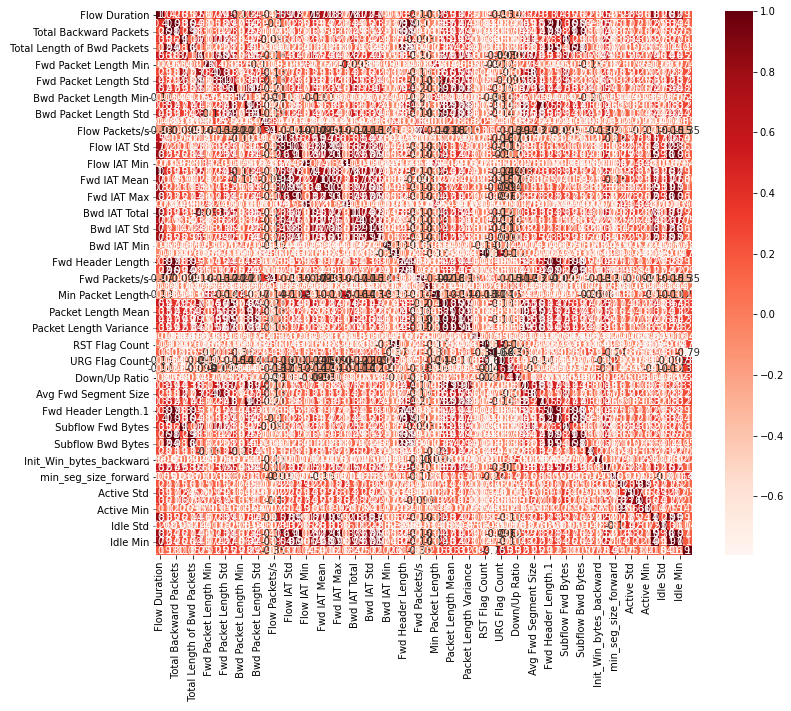

In [9]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.193272
 Total Fwd Packets              0.132965
 Total Backward Packets         0.102504
Total Length of Fwd Packets     0.132664
 Total Length of Bwd Packets    0.057310
                                  ...   
Idle Mean                       0.175888
 Idle Std                       0.041298
 Idle Max                       0.160986
 Idle Min                       0.186077
Label                           1.000000
Name: Label, Length: 66, dtype: float64

In [11]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max     0.251019
 Fwd Packet Length Mean    0.248402
 Fwd Packet Length Std     0.248793
Bwd Packet Length Max      0.287465
 Bwd Packet Length Min     0.283632
 Bwd Packet Length Mean    0.287285
 Bwd Packet Length Std     0.268881
 Flow Packets/s            0.346022
Bwd IAT Total              0.215621
Fwd PSH Flags              0.301851
Fwd Packets/s              0.348311
 Max Packet Length         0.300607
 Packet Length Mean        0.300929
 Packet Length Std         0.311781
 Packet Length Variance    0.231030
 RST Flag Count            0.301851
 ACK Flag Count            0.793299
 URG Flag Count            0.548984
 CWE Flag Count            0.345119
 Down/Up Ratio             0.315446
 Average Packet Size       0.307782
 Avg Fwd Segment Size      0.248402
 Avg Bwd Segment Size      0.287285
 min_seg_size_forward      0.388069
Label                      1.000000
Name: Label, dtype: float64